# Vasicek

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm


# add the directory where fixed_income_derivatives.py is located to the system path
import sys
import os
sys.path.append(os.path.abspath("../../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid

## Problem 3: Fitting a Vasicek model to data

### Setup

In [2]:
r0, a, b, sigma = 0.03, 0.5, 0.04, 0.04
T_max = 10
alpha = 0.25
M = int(T_max / alpha)+1
T = np.array([i*alpha for i in range(0,M)])
p = fid.zcb_price_vasicek(r0,a,b,sigma,T)
R = fid.spot_rate_vasicek(r0,a,b,sigma,T) # lol dunno why he defines R and p here...

# "DATA"
# timings 0-10 years
T = np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75,
5, 5.25, 5.5, 5.75, 6, 6.25, 6.5, 6.75, 7, 7.25, 7.5, 7.75, 8, 8.25, 8.5, 8.75, 9, 9.25, 9.5, 9.75, 10])

# rates
R = np.array([0.036, 0.03711, 0.03797, 0.03875, 0.03946, 0.0401, 0.04069, 0.04122, 0.04171, 0.04216, 0.04257, 0.04294, 0.04329,
0.0436, 0.0439, 0.04417, 0.04441, 0.04464, 0.04486, 0.04506, 0.04524, 0.04541, 0.04557, 0.04572, 0.04586, 0.04599, 0.04611,
0.04622, 0.04633, 0.04643, 0.04653, 0.04662, 0.0467, 0.04678, 0.04686, 0.04693, 0.047, 0.04706, 0.04712, 0.04718, 0.04724])

### (a)

In [10]:
param_0 = 0.03, 0.5, 0.04, 0.03
result = minimize(fid.fit_vasicek_obj,param_0,method='nelder-mead', args = (R,T), options={'xatol':1e-20,'disp':True})
print(f'Parameters from the fit:\n{result.x} \nSSE of fit:\n{result.fun}')
r0,a,b,sigma = result.x
p = fid.zcb_price_vasicek(r0,a,b,sigma,T)
f = fid.forward_rate_vasicek(r0,a,b,sigma,T)
T_swap = [1,2,3,4,5,6,7,8,9,10]
R_swap = np.zeros([10])
for i in range(0,10):
    R_swap[i] = fid.swap_rate_from_zcb_prices(0,0,T_swap[i],"quaterly",T,p)[0]
f_3m = fid.forward_rates_from_zcb_prices(T,p,horizon=1)

Parameters from the fit:
[0.036      0.60042112 0.0300103  0.01968804] 
SSE of fit:
2.5751868860945455e-10


/var/folders/yw/jsw5n53s1cb1s2q6tt0msrm00000gn/T/ipykernel_35895/1739808910.py:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(fid.fit_vasicek_obj,param_0,method='nelder-mead', args = (R,T), options={'xatol':1e-20,'disp':True})


IndexError: index 0 is out of bounds for axis 0 with size 0

NameError: name 'f_3m' is not defined

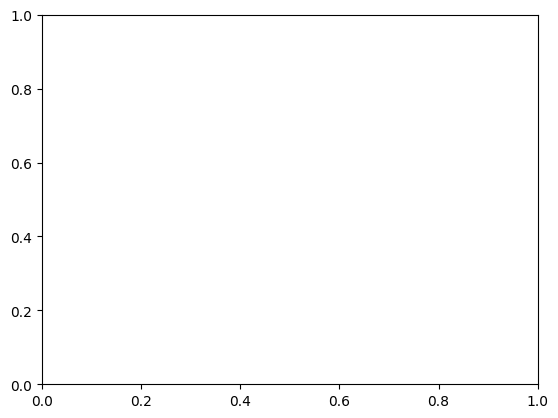

In [5]:
# Plot spot and forward rates
fig, ax1 = plt.subplots()

scatter1 = ax1.scatter(T, f_3m, label='Forward rates', alpha=0.5, marker='.', color='red')
scatter2 = ax1.scatter(T, R, label='Spot rates', alpha=0.5, marker='.', color='blue')
ax1.set_ylim([0, 0.055])
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Rates')

# Add bond prices to the plot on the right axis
ax2 = ax1.twinx()
scatter3 = ax2.scatter(T, p, label='ZCB prices', alpha=0.5, marker='.', color='black')
ax2.set_ylim([0, 1.1])
ax2.set_ylabel('Bond Prices')

# Combine legends
scatters = [scatter1, scatter2, scatter3]
labels = [scatter.get_label() for scatter in scatters]
ax1.legend(scatters, labels, loc='lower right')

plt.title('Spot, Forward Rates and Bond')
plt.show()
plt.close()

# Last year's code

/var/folders/yw/jsw5n53s1cb1s2q6tt0msrm00000gn/T/ipykernel_37511/2006951385.py:14: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  result = minimize(fid.fit_vasicek_obj,param_0,method = 'nelder-mead',args = (R,T),options={'xatol': 1e-20,'disp': True})


Parameters from the fit: [0.02 0.6  0.03 0.02]. SSE of the fit: 3.6111186457260672e-34
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 238
         Function evaluations: 451
Parameters from the fit without sigma: [0.02 0.6  0.03]. SE of the fit: 5.175936725540696e-34
Par swap rate: 0.04433512150682563
Caplet prices: [ 0.          0.          0.82727383  4.92962125  9.78459279 14.003043
 17.28465884 19.6804256  21.33830596 22.41599481 23.05217838 23.35958339
 23.42612138 23.31867153 23.08729692 22.76905597 22.39115737 21.97345193
 21.53034602 21.07224436 20.60662489]
Cap price: 356.85064818963457, cap premium: 21.986708297323425
price_cab after bump: 0.037698999085514336, difference: -20.139342665508806
price_swaption: 0.02328489061924056


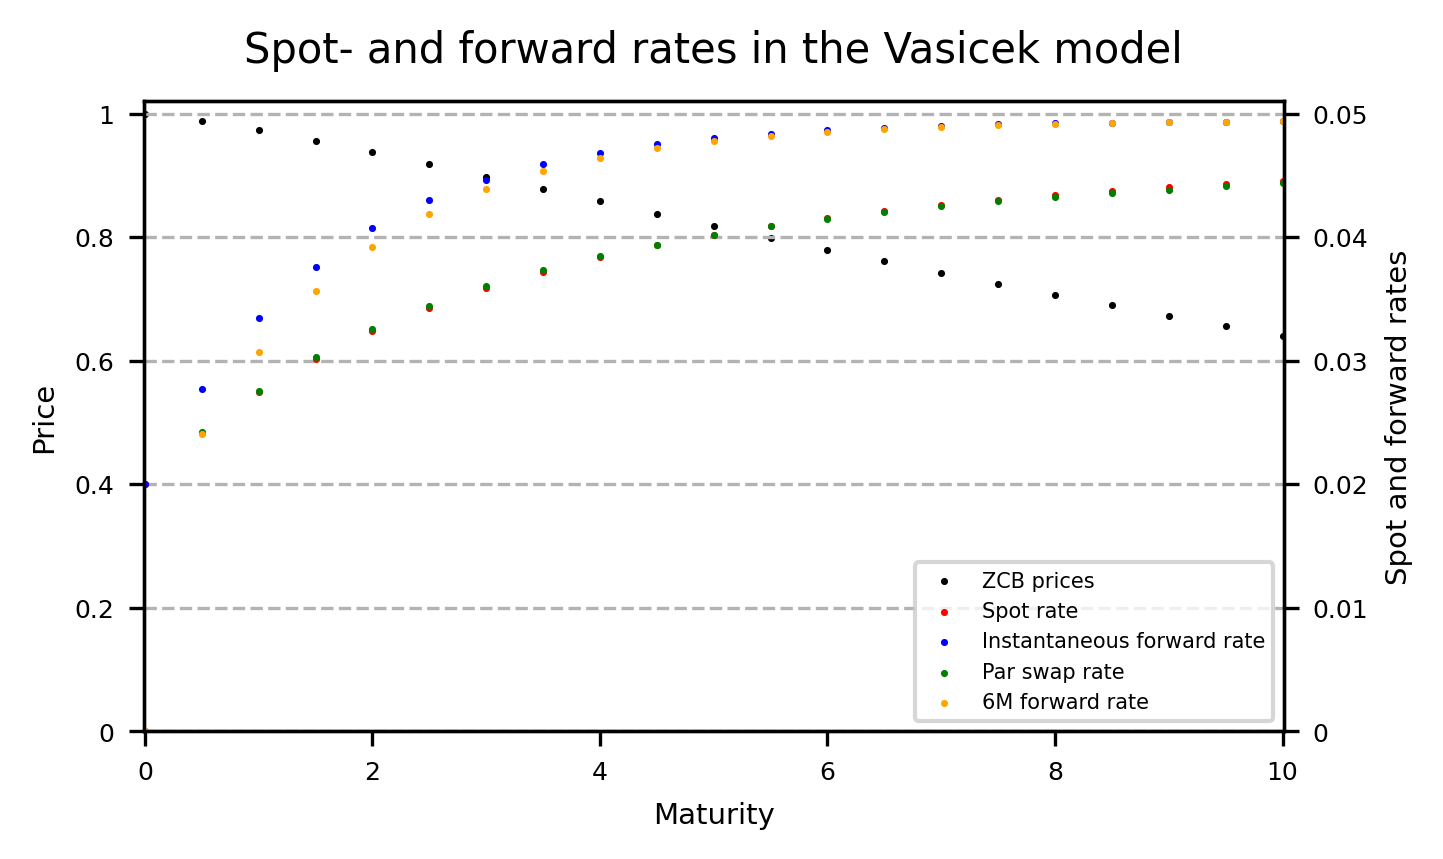

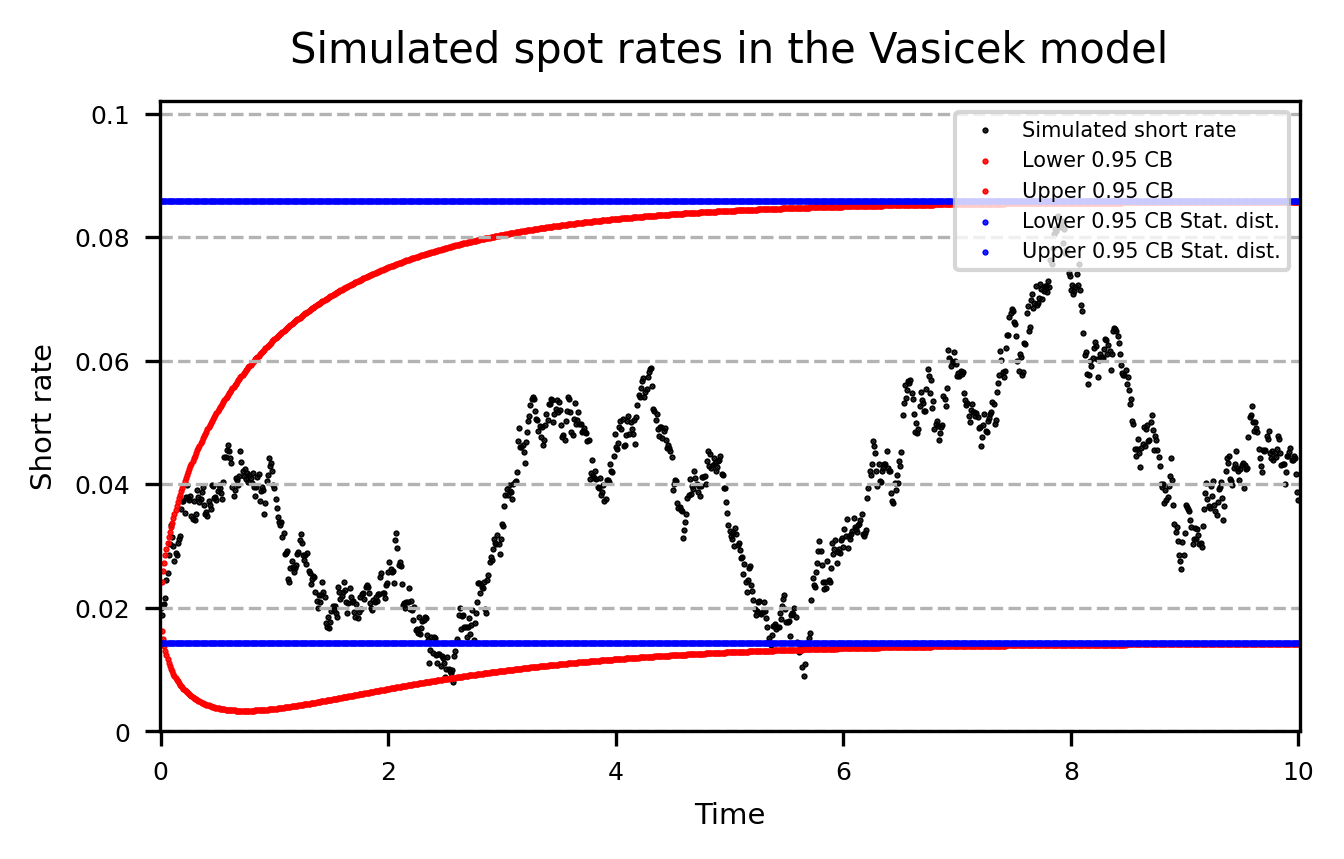

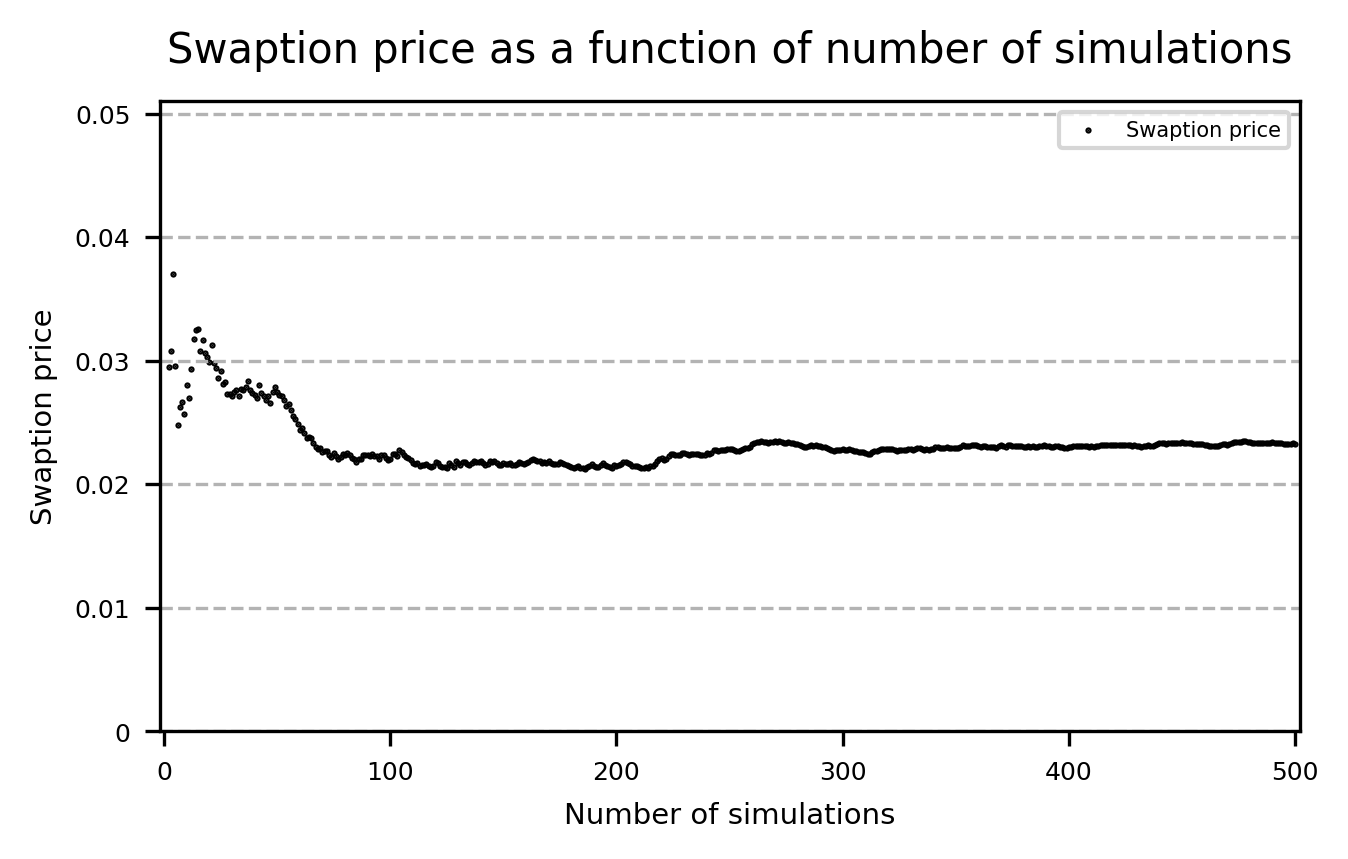

In [6]:
r0, a, b, sigma = 0.02, 0.6, 0.03, 0.02
T_max = 10
alpha = 0.5
M = int(T_max/alpha) + 1
T = np.array([i*alpha for i in range(0,M)])
p = fid.zcb_price_vasicek(r0,a,b,sigma,T)
R = fid.spot_rate_vasicek(r0,a,b,sigma,T)
f = fid.forward_rate_vasicek(r0,a,b,sigma,T)
f_6m = fid.forward_rates_from_zcb_prices(T,p,horizon = 1)


# b) Fitting a Vasicek model to data
param_0 = 0.03, 0.5, 0.04, 0.04
result = minimize(fid.fit_vasicek_obj,param_0,method = 'nelder-mead',args = (R,T),options={'xatol': 1e-20,'disp': True})
print(f"Parameters from the fit: {result.x}. SSE of the fit: {result.fun}")

param_0 = 0.03, 0.5, 0.04
result = minimize(fid.fit_vasicek_no_sigma_obj,param_0,method = 'nelder-mead',args = (sigma,R,T),options={'xatol': 1e-20,'disp': True})
print(f"Parameters from the fit without sigma: {result.x}. SE of the fit: {result.fun}")

# c) Swap rate or forward swap rate
idx_n, idx_N = 0, 20
S_swap = 0
for idx in range(idx_n+1,idx_N+1):
    S_swap += alpha*p[idx]
R_swap = (p[idx_n] - p[idx_N])/S_swap
print(f"Par swap rate: {R_swap}")

# Plotting the spot par swap rate
def swap_fct(idx_n,idx_N,alpha,p):
    S_swap = 0
    for idx in range(idx_n+1,idx_N+1):
        S_swap += alpha*p[idx]
    R_swap = (p[idx_n] - p[idx_N])/S_swap
    return R_swap, S_swap

R_swap_plot = np.zeros([M])
S_swap_plot = np.zeros([M])
idx_N_plot = np.array([i for i in range(1,M)])
for idx in idx_N_plot:
    R_swap_plot[idx], S_swap_plot[idx] = swap_fct(0,idx,alpha,p)[0], swap_fct(0,idx,alpha,p)[1]

# d) Caplet and cap prices
strike = 0.05
idx_cap_begin, idx_cap_end = 2, M
price_caplet = np.zeros([M])
for i in range(2,M):
    price_caplet[i] = (1 + alpha*strike)*fid.euro_option_price_vasicek(1/(1 + alpha*strike),T[i-1],T[i],p[i-1],p[i],a,sigma,type = "put")
price_cap = sum(price_caplet[idx_cap_begin:idx_cap_end])
premium = alpha*(price_cap/S_swap)
print(f"Caplet prices: {10000*price_caplet}")
print(f"Cap price: {10000*price_cap}, cap premium: {10000*premium}")

def price_cap_fct(sigma,strike,S_swap,idx_cap_begin,idx_cap_end,M,alpha,T,a):
    p = fid.zcb_price_vasicek(r0,a,b,sigma,T)
    price_caplet = np.zeros([M])
    for i in range(2,M):
        price_caplet[i] = (1 + alpha*strike)*fid.euro_option_price_vasicek(1/(1 + alpha*strike),T[i-1],T[i],p[i-1],p[i],a,sigma,type = "put")
    price_cap = sum(price_caplet[idx_cap_begin:idx_cap_end])
    premium = alpha*(price_cap/S_swap)
    return price_cap, premium

price_cap_bump = price_cap_fct(sigma+0.001,strike,S_swap,idx_cap_begin,idx_cap_end,M,alpha,T,a)
print(f"price_cab after bump: {price_cap_bump[0]}, difference: {10000*(price_cap-price_cap_bump[0])}")

# Simulating the short rate in the Vasicek model
np.random.seed(13)
M_simul, T_simul = 1000, 10
size_ci = 0.95
r_simul = fid.simul_vasicek(r0,a,b,sigma,M_simul,T_simul,method = "exact")
t_simul = np.array([i*(T_simul/M_simul) for i in range(0,M_simul+1)])
lb, ub = fid.ci_vasicek(r0,a,b,sigma,t_simul,size_ci)
mu_sd, sigma_sd = b/a, sigma/(np.sqrt(2*a))
lb_sd = mu_sd - norm.ppf(size_ci + 0.5*(1-size_ci))*sigma_sd
ub_sd = mu_sd + norm.ppf(size_ci + 0.5*(1-size_ci))*sigma_sd

# f) Computing the price of a 2Y8Y swaption
idx_n_swaption, idx_N_swaption = 4, 20
M_simul_swaption, N_simul, T_simul_swaption = 400, 500, T[idx_n_swaption]
chi, price_swaption_simul, price_swaption_plot = np.zeros([N_simul]), np.zeros([N_simul]), np.zeros([N_simul])
T_swaption = np.array([T[i] - T[idx_n_swaption] for i in range(idx_n_swaption,idx_N_swaption+1)])
R_swaption = 0.045
for i in range(0,N_simul):
    r_simul_swaption = fid.simul_vasicek(r0,a,b,sigma,M_simul_swaption,T_simul_swaption,method = "exact")
    p_swaption = fid.zcb_price_vasicek(r_simul_swaption[-1],a,b,sigma,T_swaption)
    R_swap, S_swap = swap_fct(0,idx_N_swaption-idx_n_swaption,alpha,p_swaption)
    chi[i] = max(R_swap-R_swaption,0)*S_swap
    price_swaption_simul[i] = np.exp(-(T_simul_swaption/M_simul_swaption)*sum(r_simul_swaption))*chi[i]
    price_swaption_plot[i] = sum(price_swaption_simul[0:i+1])/(i+1)
price_swaption = sum(price_swaption_simul)/N_simul
print(f"price_swaption: {price_swaption}")

# PLot of zcb prices, spot rates and instantaneous forward rates in the Vasicek model
fig = plt.figure(constrained_layout=False,dpi=300,figsize=(5,3))
fig.suptitle(f"Spot- and forward rates in the Vasicek model",fontsize=10)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0,2,4,6,8,10]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]-0.01,xticks[-1]+0.01])
plt.xlabel(f"Maturity",fontsize = 7)
yticks1 = [0,0.2,0.4,0.6,0.8,1]
ax.set_yticks(yticks1)
ax.set_yticklabels(yticks1,fontsize = 6)
ax.set_ylim([yticks1[0],yticks1[-1] + (yticks1[-1]-yticks1[0])*0.02])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Price",fontsize = 7)
p1 = ax.scatter(T, p, s = 2, color = 'black', marker = ".",label="ZCB prices")
ax2 = ax.twinx()
yticks2 = [0,0.01,0.02,0.03,0.04,0.05]
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2,fontsize = 6)
ax2.set_ylim([yticks2[0],yticks2[-1]+(yticks2[-1]-yticks2[0])*0.02])
ax2.set_ylabel(f"Spot and forward rates",fontsize = 7)
p2 = ax2.scatter(T, R, s = 2, color = 'red', marker = ".",label="Spot rate")
p3 = ax2.scatter(T, f, s = 2, color = 'blue', marker = ".",label="Instantaneous forward rate")
p4 = ax2.scatter(T, R_swap_plot, s = 2, color = 'green', marker = ".",label="Par swap rate")
p5 = ax2.scatter(T, f_6m, s = 2, color = 'orange', marker = ".",label="6M forward rate")
plots = [p1,p2,p3,p4,p5]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="lower right",fontsize = 5)
# fig.savefig("C:/")
plt.show()


# PLot of simulated short rates in the Vasicek model
fig = plt.figure(constrained_layout=False,dpi=300,figsize=(5,3))
fig.suptitle(f"Simulated spot rates in the Vasicek model",fontsize=10)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0,2,4,6,8,10]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]-0.01,xticks[-1]+0.01])
plt.xlabel(f"Time",fontsize = 7)
yticks1 = [0,0.02,0.04,0.06,0.08,0.1]
ax.set_yticks(yticks1)
ax.set_yticklabels(yticks1,fontsize = 6)
ax.set_ylim([yticks1[0],yticks1[-1] + (yticks1[-1]-yticks1[0])*0.02])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Short rate",fontsize = 7)
p1 = ax.scatter(t_simul, r_simul, s = 1, color = 'black', marker = ".",label="Simulated short rate")
p2 = ax.scatter(t_simul, lb, s = 1, color = 'red', marker = ".",label=f"Lower {size_ci} CB")
p3 = ax.scatter(t_simul, ub, s = 1, color = 'red', marker = ".",label=f"Upper {size_ci} CB")
p4 = ax.scatter(t_simul, lb_sd*np.ones([M_simul+1]), s = 1, color = 'blue', marker = ".",label=f"Lower {size_ci} CB Stat. dist.")
p5 = ax.scatter(t_simul, ub_sd*np.ones([M_simul+1]), s = 1, color = 'blue', marker = ".",label=f"Upper {size_ci} CB Stat. dist.")
plots = [p1,p2,p3,p4,p5]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="upper right",fontsize = 5)
# fig.savefig("C:/")
plt.show()


# Plot of option prices as a function of N_simul
fig = plt.figure(constrained_layout=False,dpi=300,figsize=(5,3))
fig.suptitle(f"Swaption price as a function of number of simulations",fontsize=10)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0,int((1/5)*N_simul),int((2/5)*N_simul),int((3/5)*N_simul),int((4/5)*N_simul),int(N_simul)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]-2,xticks[-1]+2])
plt.xlabel(f"Number of simulations",fontsize = 7)
yticks1 = [0,0.01,0.02,0.03,0.04,0.05]
ax.set_yticks(yticks1)
ax.set_yticklabels(yticks1,fontsize = 6)
ax.set_ylim([yticks1[0],yticks1[-1] + (yticks1[-1]-yticks1[0])*0.02])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
ax.set_ylabel(f"Swaption price",fontsize = 7)
p1 = ax.scatter([i for i in range(1,N_simul+1)], price_swaption_plot, s = 1, color = 'black', marker = ".",label="Swaption price")
plots = [p1]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="upper right",fontsize = 5)
# fig.savefig("C:/")
plt.show()

## 4. Caplets

$$
\begin{align*}
x \text(quaterly) &= price\_cap(t=0) = \sum_{i=1}^N p(0,T_i) (T_i - T_{i-1}) y  \\
&= y \sum_{i=1}^N (T_i - T_{i-1}) \\
&= \alpha y \sum_{i=1}^N p(0,T_i), \quad \alpha = (T_i - T_{i-1}) = 0.25 \text{ or atleast always constant} \\
x &=  \alpha y S
\end{align*}
$$

Where $y$ is the premium paid annually in basispoints, $S$ is the som of payments, $\alpha$ is the time interval (then $\alpha y$ gives the premium paid each period)

## 5. Simulation of the Vasicek model

In [ ]:
M_simul, T_simul = 1000, 10
size_ci = 0.95

## 6. Pricing swaptions


In [ ]:
np.random.seed(2024)
T_n, T_N = 2, 10
M_simul_swaption, N_simul_swaption, T_simul_swaption = 1000, 1250, T_n
chi, price_swaption_simul, price_swaption_plot = np.zeros([N_simul_swaption]), np.zeros([N_simul_swaption]), np.zeros([N_simul_swaption])
T_swaption = np.array([i*0.25 for i in range(0, 33)])
for i in range(0, N_simul_swaption):
    r_simul_swaption = fid.simul_vasicek(r0,a,b,sigma,M,T_n,method='exact')
    p_swaption = fid.zcb_price_vasicek(r_simul_swaption[-1],a,b,sigma,T_swaption)
    R_swaption, S_swaption = fid.swap_rate_from_zcb_prices(0,0,10-2,'annual',T_swaption,p_swaption,float_freq='quaterly')
    chi[i] = np.max(R_swaption - strike,0) * S_swaption
    price_swaption_simul[i] = np.exp(-(T_simul_swaption/M_simul_swaption)*np.sum(r_simul_swaption))*chi[i]
    price_swaption_plot[i] = sum(price_swaption_simul[0:i+1])/(i+1) * 10000
print(f'Swaption price: {price_swaption_plot[-1]}')